In [75]:
# Hamza Shahid
# Netid: Hshahi2
# Joshua Herman
# Netid: jherma20
# Muhammad Abdullah Umar
# Netid: mumar4
# Final Project - Diabetes Analysis

In [76]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import statsmodels.formula.api as smf
pd.set_option('display.max_columns',100)
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, fcluster

In [77]:
# load the dataset using pandas.read_csv
DIABETES_DATA = pd.read_csv('diabetes.csv')

In [78]:
# display the dataset
DIABETES_DATA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
# dealing with missing values 
imputerBloodPressure=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["BloodPressure"]=imputerBloodPressure.fit_transform(DIABETES_DATA[["BloodPressure"]]).ravel()

imputerSkinThickness=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["SkinThickness"]=imputerSkinThickness.fit_transform(DIABETES_DATA[["SkinThickness"]]).ravel()

imputerBMI=Imputer(missing_values=0, strategy="mean" )
DIABETES_DATA["BMI"]=imputerBMI.fit_transform(DIABETES_DATA[["BMI"]]).ravel()

DIABETES_DATA

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.000000,35.00000,0,33.600000,0.627,50,1
1,1,85,66.000000,29.00000,0,26.600000,0.351,31,0
2,8,183,64.000000,29.15342,0,23.300000,0.672,32,1
3,1,89,66.000000,23.00000,94,28.100000,0.167,21,0
4,0,137,40.000000,35.00000,168,43.100000,2.288,33,1
5,5,116,74.000000,29.15342,0,25.600000,0.201,30,0
6,3,78,50.000000,32.00000,88,31.000000,0.248,26,1
7,10,115,72.405184,29.15342,0,35.300000,0.134,29,0
8,2,197,70.000000,45.00000,543,30.500000,0.158,53,1
9,8,125,96.000000,29.15342,0,32.457464,0.232,54,1


                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     65.81
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           1.97e-15
Time:                        18:56:27   Log-Likelihood:                -2972.1
No. Observations:                 768   AIC:                             5948.
Df Residuals:                     766   BIC:                             5958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.3429      2.024     27.838      0.0

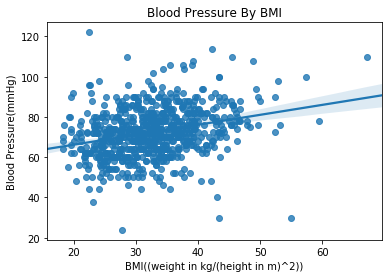

In [83]:
# plot blood pressure vs BMI
axis=sns.regplot(DIABETES_DATA['BMI'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By BMI', xlabel='BMI((weight in kg/(height in m)^2))', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ BMI', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     90.21
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           2.66e-20
Time:                        18:56:28   Log-Likelihood:                -2961.0
No. Observations:                 768   AIC:                             5926.
Df Residuals:                     766   BIC:                             5935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.3070      1.239     49.467      0.0

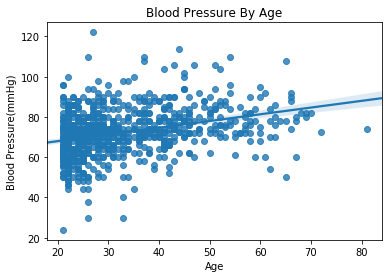

In [84]:
# plot blood pressure vs age
axis=sns.regplot(DIABETES_DATA['Age'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By Age', xlabel='Age', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ Age', data=DIABETES_DATA)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     29.58
Date:                Mon, 03 Dec 2018   Prob (F-statistic):           7.23e-08
Time:                        18:56:29   Log-Likelihood:                -2989.2
No. Observations:                 768   AIC:                             5982.
Df Residuals:                     766   BIC:                             5992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        64.6703      1.485     43.538

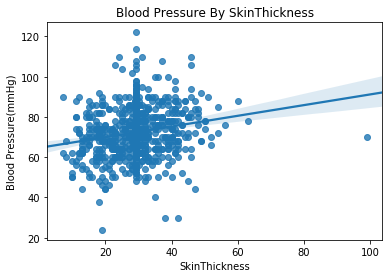

In [85]:
# plot blood pressure vs glucose
axis=sns.regplot(DIABETES_DATA['SkinThickness'],DIABETES_DATA['BloodPressure'])
axis.set(title='Blood Pressure By SkinThickness', xlabel='SkinThickness', ylabel='Blood Pressure(mmHg)')


model=smf.ols(formula='BloodPressure ~ SkinThickness', data=DIABETES_DATA)
results=model.fit()
print(results.summary())